# 8

## a

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [4]:
auto = load_data("Auto")

In [5]:
design = MS(["horsepower"])
X = design.fit_transform(auto)
y = auto["mpg"]
model = sm.OLS(y, X)
result_horsepower = model.fit()

In [6]:
summarize(result_horsepower)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### (i)
Yes, since the f-statistic is low for horse power

### (ii)
RSE tells us the percentage error.
Here we see a percentage RSE error of 20.9 %

r2 tells us the percentage of variability in the response by the predictor.
Here we see that `horsepower` explains roughly 60 % of variability in `mpg`

In [7]:
mean_y = np.mean(y)

In [8]:
RSE = np.sqrt(result_horsepower.scale)

In [9]:
RSE

4.90575691954594

In [10]:
(RSE / mean_y) * 100

20.923714066914833

In [11]:
r2 = result_horsepower.rsquared

In [12]:
r2

0.6059482578894348

### (iii)
From the graph below we can see clearly that the relationship between the predictor and response is negative.

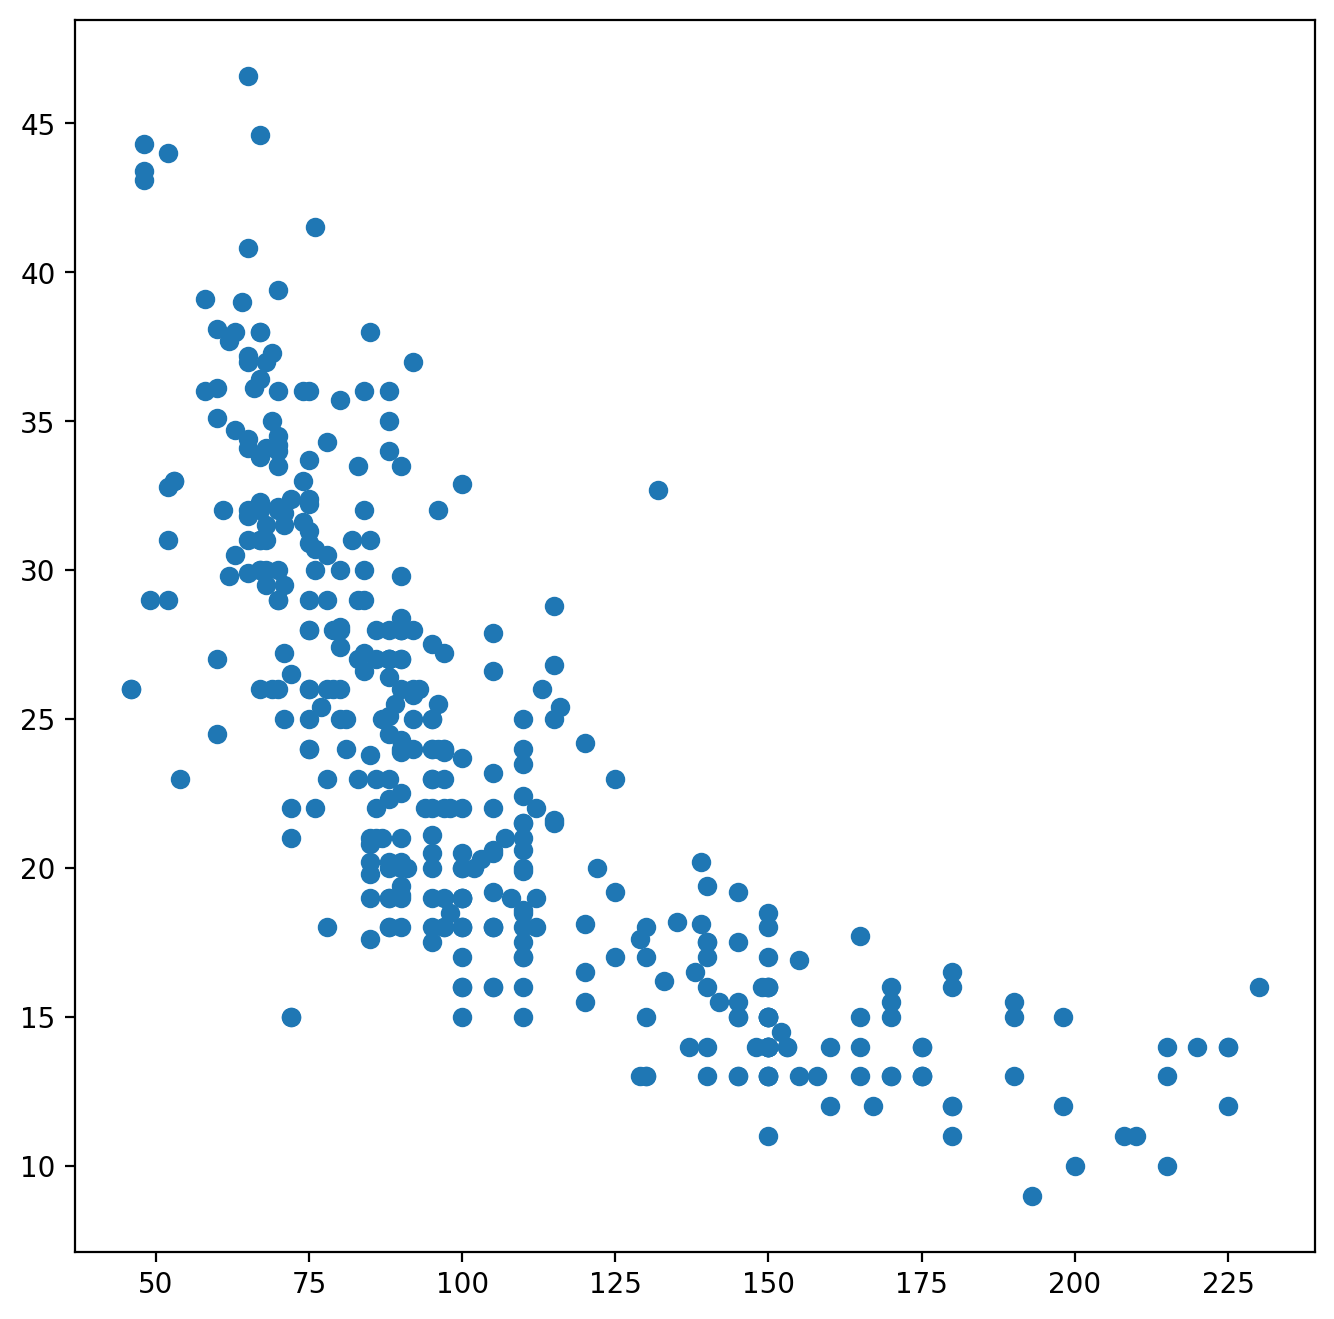

In [13]:
ax = subplots(figsize=(8,8), dpi=200)[1]
ax.scatter(X["horsepower"], y)

### (iv) 

In [14]:
new_df = pd.DataFrame({"horsepower": [150, 200, 250]})
newX = design.transform(new_df)
preds = result_horsepower.get_prediction(newX)

In [15]:
conf_interval = preds.conf_int(alpha=0.05)

In [16]:
conf_interval


array([[15.5040252 , 17.01427684],
       [ 7.06198454,  9.67184416],
       [-1.43278173,  2.3821371 ]])

In [17]:
pred_interval = preds.conf_int(obs=True, alpha=0.05)

In [18]:
pred_interval

array([[ 6.58459756, 25.93370448],
       [-1.36599947, 18.09982817],
       [-9.35716706, 10.30652243]])

## b

In [19]:
result_horsepower.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

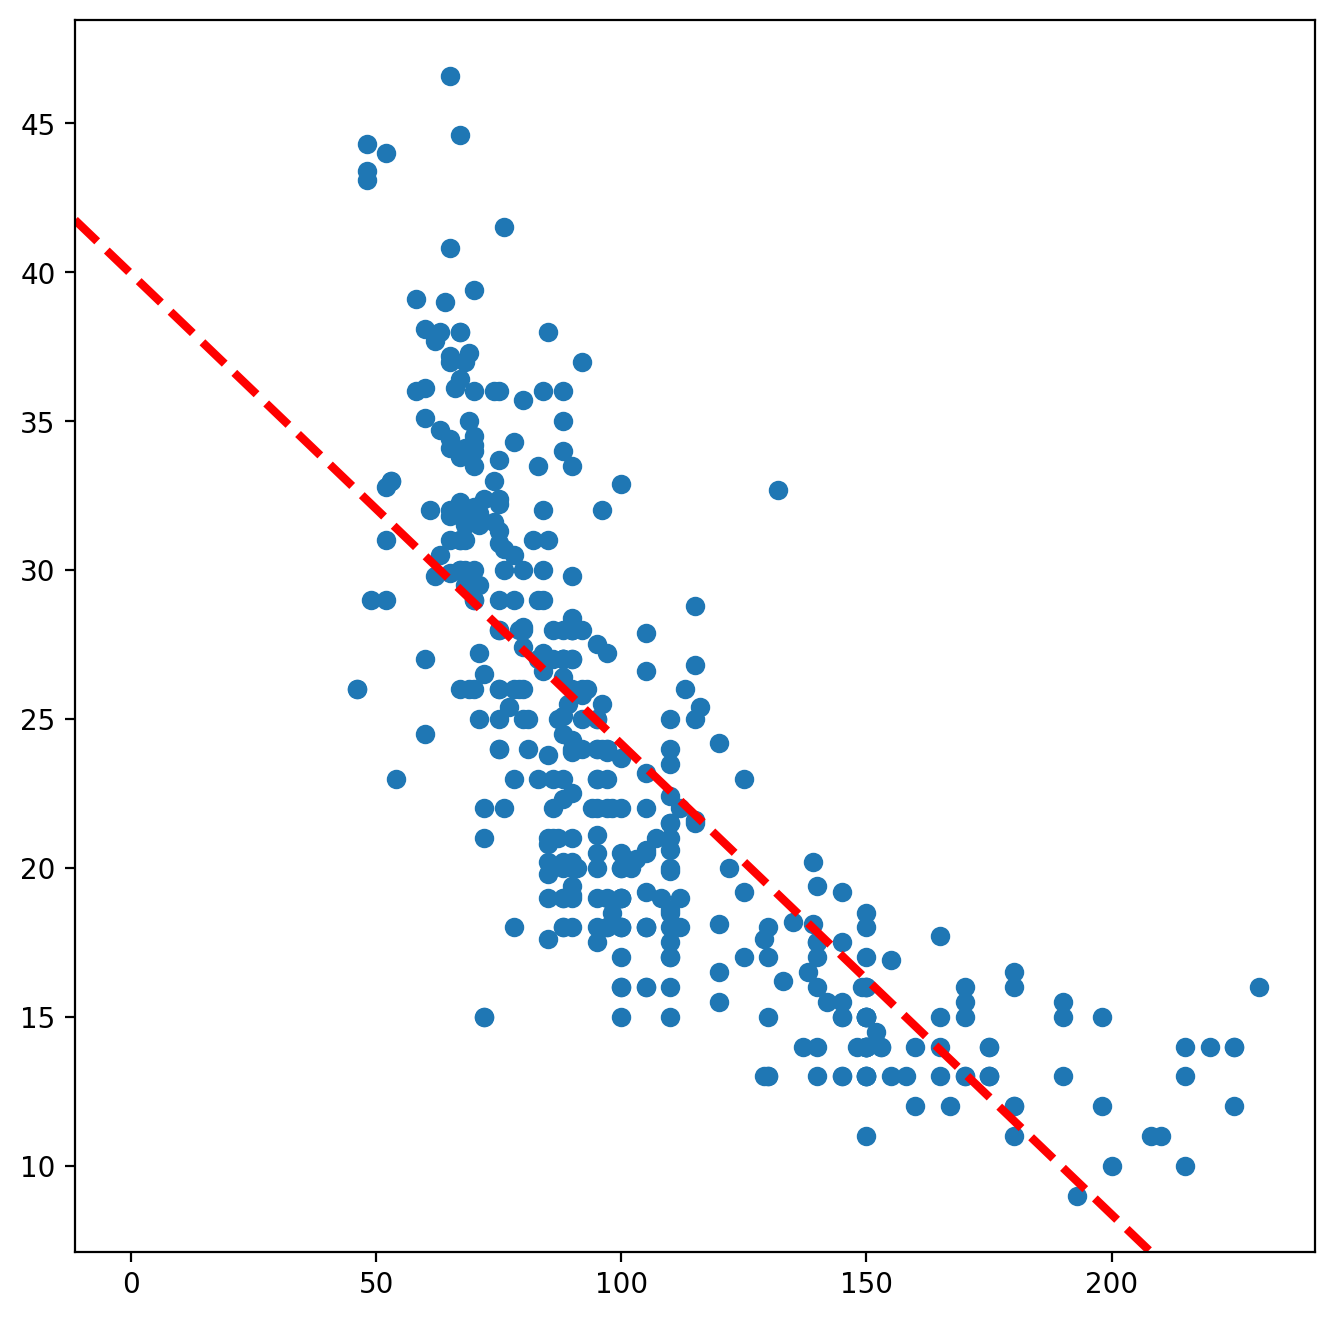

In [20]:
ax = subplots(figsize=(8,8), dpi=200)[1]
ax.scatter(X["horsepower"], y)
ax.axline(xy1=(0, result_horsepower.params[0]), slope=result_horsepower.params[1], color="r", linestyle="--", linewidth=3)

## (c)
We can notice a pattern in residual plot which shows us that some non-linear relationship exists.

There's np leverage points

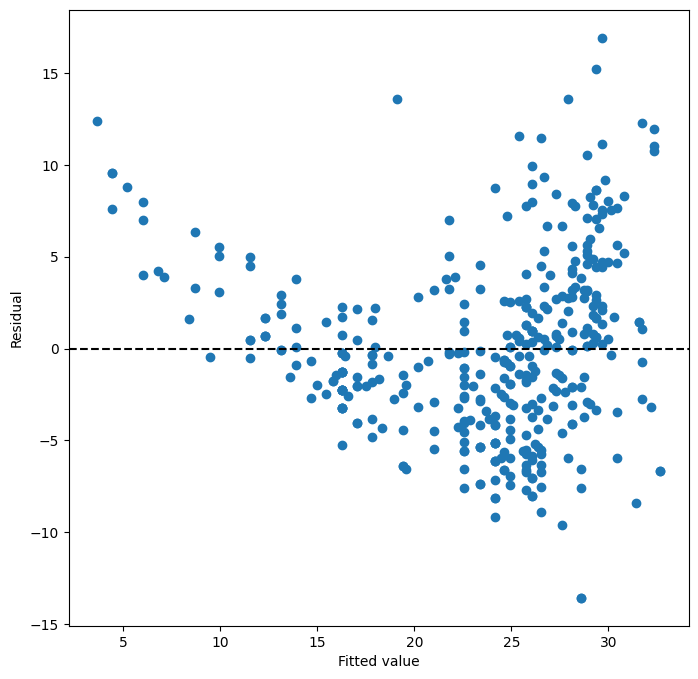

In [21]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(result_horsepower.fittedvalues, result_horsepower.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

115

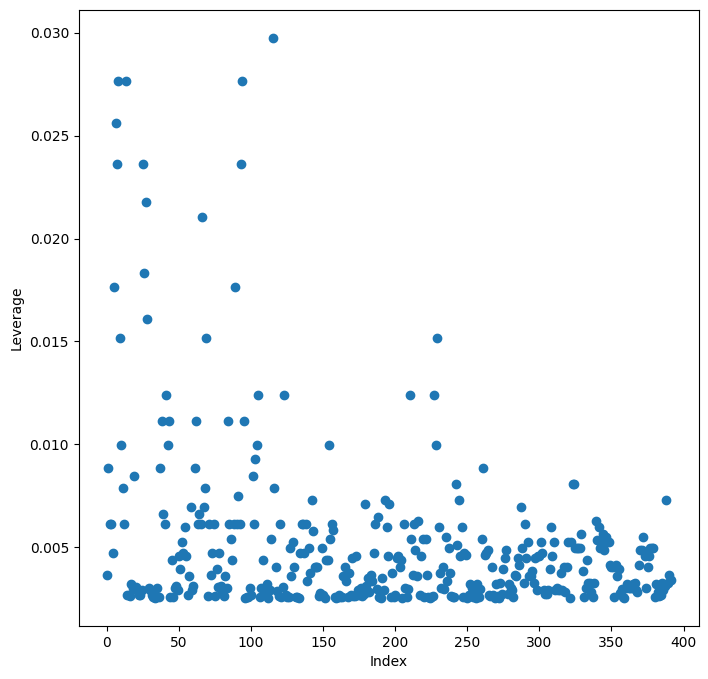

In [22]:
leverage_points = result_horsepower.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), leverage_points.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

# 9.

## (a)

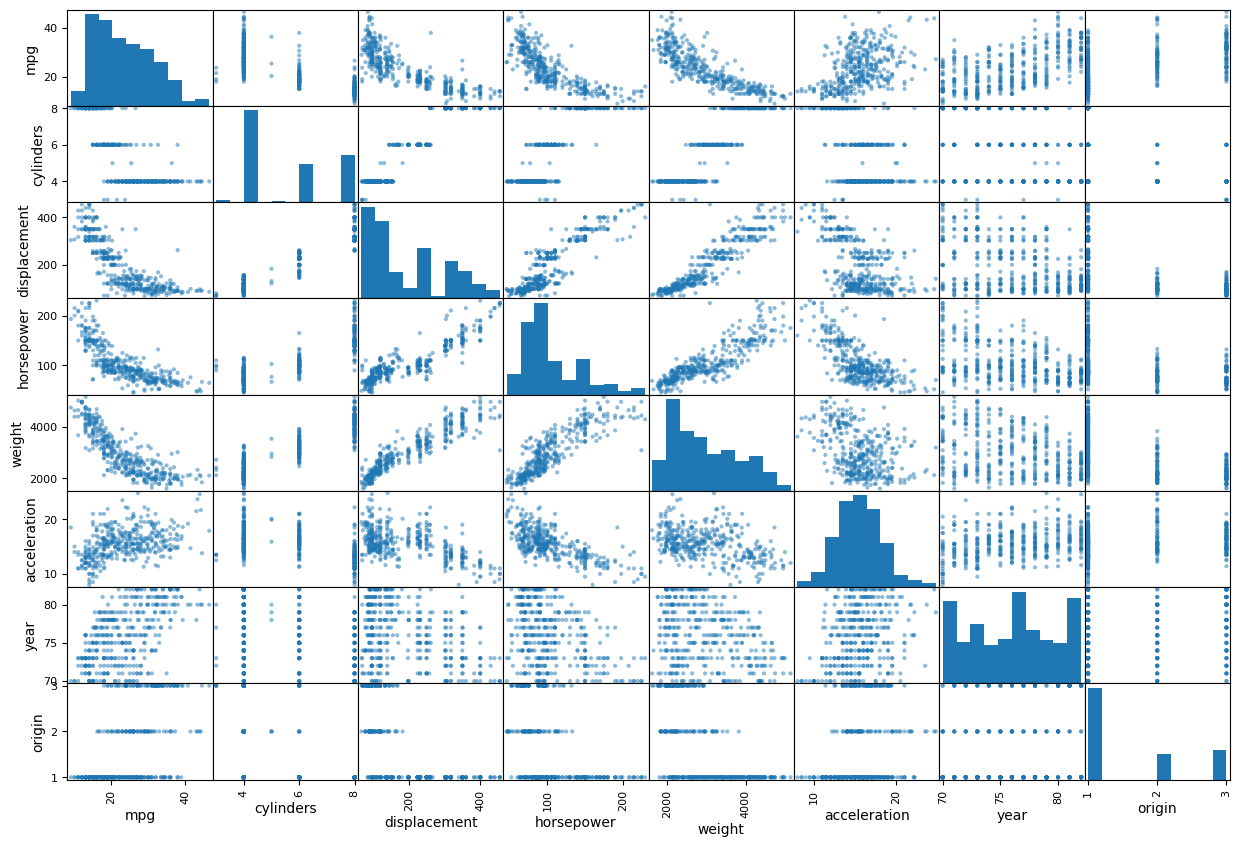

In [29]:
pd.plotting.scatter_matrix(auto, figsize=(15,10));

## (b)

In [32]:
auto.corr()

/tmp/ipykernel_13251/668445388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [34]:
design = MS(auto.drop(["name", "mpg"], axis=1))
X = design.fit_transform(auto)
y = auto["mpg"]
model_1 = sm.OLS(y, X)
result_all = model_1.fit()
summarize(result_all)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


## (c)

### (i)

In [35]:
anova_lm(result_horsepower, result_all)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


### (ii)

All variables except `cylinders`, `displacement`, `horsepower`

### (iii)

This means with every increase in year, the mpg increases by 0.75

## d
We see a pattern in the residual plot which suggests that there might be a non-linea relationship

We can see that the value in index 13 has high residual as well as high leverage which suggests that it might affect the predictions

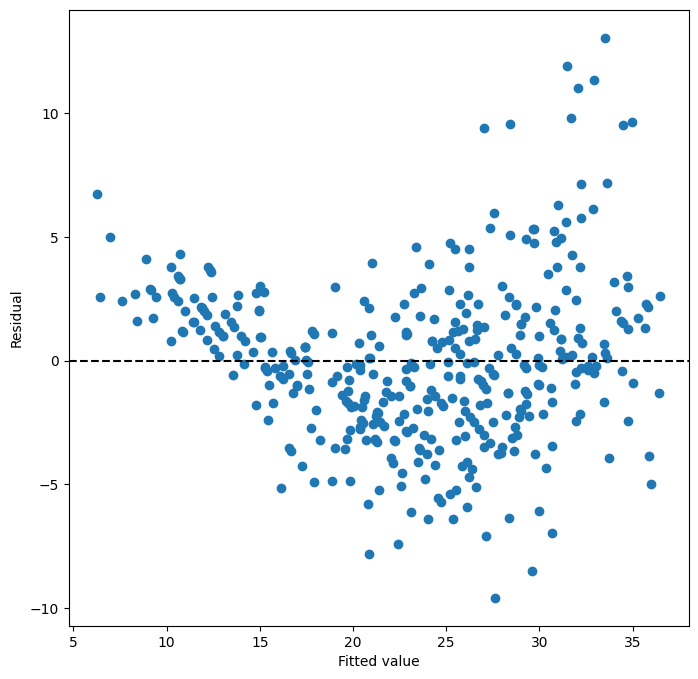

In [36]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(result_all.fittedvalues, result_all.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

13

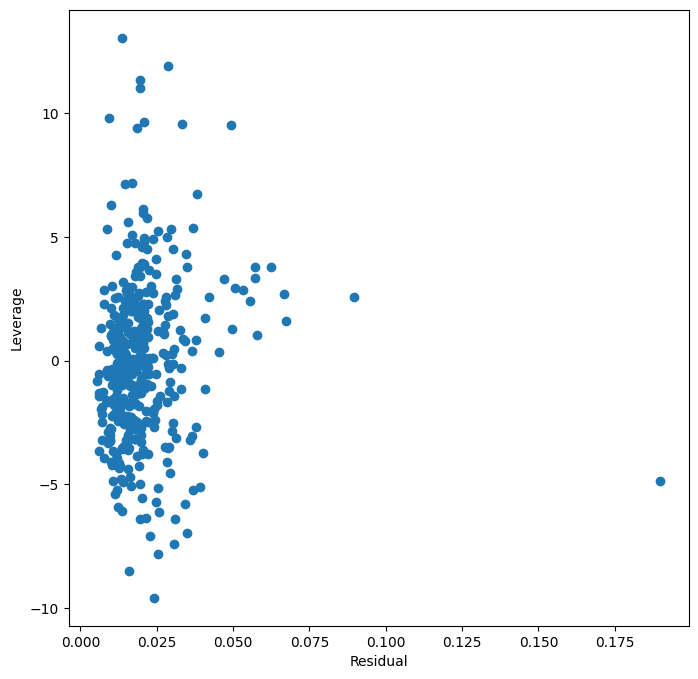

In [62]:
leverage_points = result_all.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(leverage_points.hat_matrix_diag, result_all.resid)
ax.set_xlabel("Residual")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

In [ ]:
leverage_points = result_all.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), leverage_points.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

In [47]:
design = MS(["cylinders",
             "displacement",
             "horsepower",
             "weight",
             "acceleration",
             "year",
             "origin",
             ("horsepower", "weight"), 
             ("horsepower", "displacement"), 
             ("weight", "displacement")])
X = design.fit_transform(auto)
y = auto["mpg"]
model_2 = sm.OLS(y, X)
result_all_interaction = model_2.fit()
summarize(result_all_interaction)

,coef,std err,t,P>|t|
intercept,-0.040700,4.679000,-0.009,0.993
cylinders,0.456300,0.317000,1.440,0.151
displacement,-0.062100,0.024000,-2.601,0.010
horsepower,-0.183200,0.047000,-3.866,0.000
weight,-0.006700,0.002000,-4.309,0.000
acceleration,-0.141600,0.098000,-1.452,0.147
year,0.756300,0.045000,16.835,0.000
origin,0.622000,0.264000,2.360,0.019
horsepower:weight,0.000014,0.000015,0.927,0.354
horsepower:displacement,0.000300,0.000096,3.252,0.001


From the above sumamry we can see that `displacement:horsepower` as significant effect on the prediction

In [49]:
X = MS([poly("horsepower", degree=2), "year"]).fit_transform(auto)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,-29.2975,4.264,-6.871,0.0
"poly(horsepower, degree=2)[0]",-99.0845,4.079,-24.291,0.0
"poly(horsepower, degree=2)[1]",46.5061,3.713,12.525,0.0
year,0.6942,0.056,12.382,0.0


# 10

## a

In [51]:
carseats = load_data("Carseats")

In [52]:
design = MS(["Price", "Urban", "US"])
X = design.fit_transform(carseats)
y = carseats["Sales"]
model_4 = sm.OLS(y, X)
results_carseats = model_4.fit()
summarize(results_carseats)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


## (b)

`price` - a decrease of sales by 0.0545 with increase in price

`Urban` - a decrease of sales by 0.0219 if present in `Urban` but no evidence as the p value is low

`US` - an increas of sales by 1.2006 if present in `US`

## (c)

sales = 13.0435 - (0.0545 * Price) - (0.0219 * Urban) + (1.2006 * US)

## (d)
We can reject the null hypothesis for `price` and `US` but not for `Urban` as the p-value is high

## (e)

In [53]:
design = MS(["Price", "US"])
X = design.fit_transform(carseats)
y = carseats["Sales"]
model_5 = sm.OLS(y, X)
resuls_small = model_5.fit()
summarize(resuls_small)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


 ## (f)

In [54]:
RSE_big = np.sqrt(results_carseats.scale)
RSE_small = np.sqrt(resuls_small.scale)

In [55]:
RSE_big, RSE_small

(2.4724924402701642, 2.469396800574444)

In [56]:
r2_big = results_carseats.rsquared

In [57]:
r2_small = resuls_small.rsquared

In [58]:
r2_big, r2_small

(0.23927539218405547, 0.23926288842678567)

## (e)

In [59]:
conf_big = results_carseats.conf_int(alpha=0.05)

In [60]:
conf_small = resuls_small.conf_int(alpha=0.05)

In [61]:
conf_big, conf_small

(                    0          1
 intercept   11.763597  14.323341
 Price       -0.064764  -0.044154
 Urban[Yes]  -0.555973   0.512141
 US[Yes]      0.691304   1.709841,
                   0          1
 intercept  11.79032  14.271265
 Price      -0.06476  -0.044195
 US[Yes]     0.69152   1.707766)

## (h)
Data point 42 has high leverage as well is an outlier

42

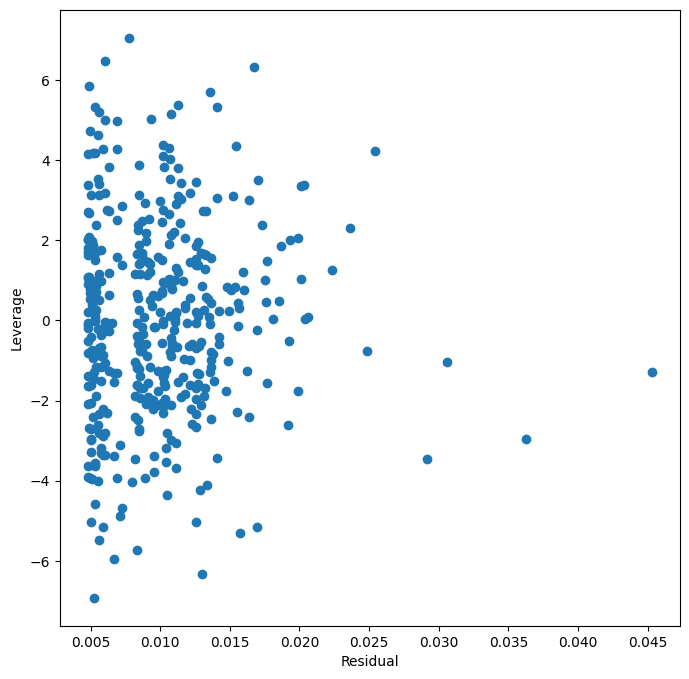

In [63]:
leverage_points = results_carseats.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(leverage_points.hat_matrix_diag, results_carseats.resid)
ax.set_xlabel("Residual")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)

42

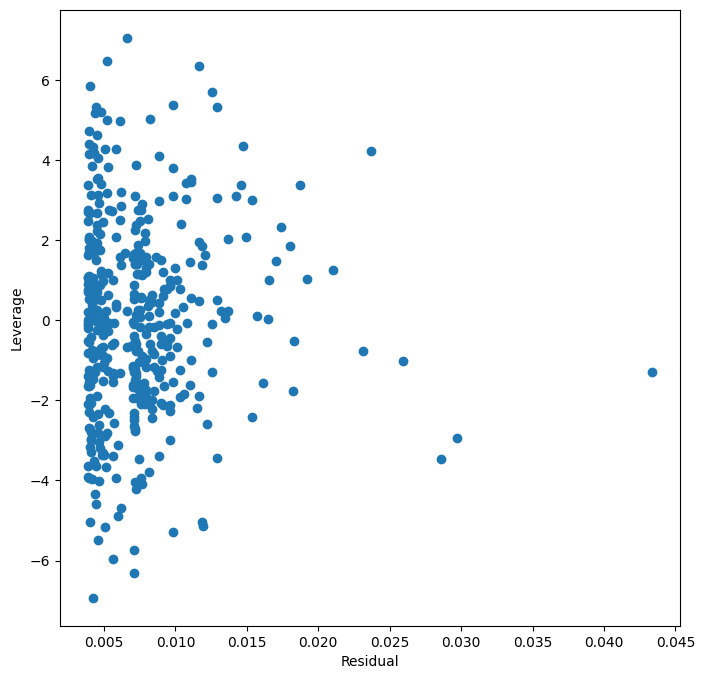

In [64]:
leverage_points = resuls_small.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(leverage_points.hat_matrix_diag, resuls_small.resid)
ax.set_xlabel("Residual")
ax.set_ylabel("Leverage")
np.argmax(leverage_points.hat_matrix_diag)